In [ ]:
"""Script to plot cross-decoding of orientations over time from DecodingAcrossTime.ipynb and TimeWindowDiscreteDecoding.ipynb"""

import os, mne, pickle, numpy as np, pandas as pd, time
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
top_dir = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data'
data_dir = os.path.join(top_dir, 'ProportionsOverTime/Data')
times_dir = os.path.join(top_dir, 'times')
output_dir = os.path.join(top_dir, 'ProportionsOverTime/Plots')
file_path1 = os.path.join(data_dir, 'GroupAverage_SequencedAccuracyEarlyall.npy')
file_path2 = os.path.join(data_dir, 'GroupAverage_SequencedAccuracyLateall.npy')
file_path_times = os.path.join(times_dir, 'TimesForPlotsDynamic.npy')
file_path_times2 = os.path.join(times_dir, 'TimesForPlots.npy')

group_avgEarly = np.load(file_path1)
group_avgLate = np.load(file_path2)
# Load in LDA-trained group averages for early and late training windows
lda_data_dir = os.path.join(top_dir, 'LDA-16way Static/data')
lda_early_path = os.path.join(lda_data_dir, 'Mean_DecodingAccuracyTimecourseEarlyWindow.npy')
lda_late_path = os.path.join(lda_data_dir, 'Mean_DecodingAccuracyTimecourseLateWindow.npy')

group_avg_withinEarly = np.load(lda_early_path)
group_avg_withinLate = np.load(lda_late_path)

times = np.load(file_path_times, allow_pickle=True)
timesStill = np.load(file_path_times2, allow_pickle=True)

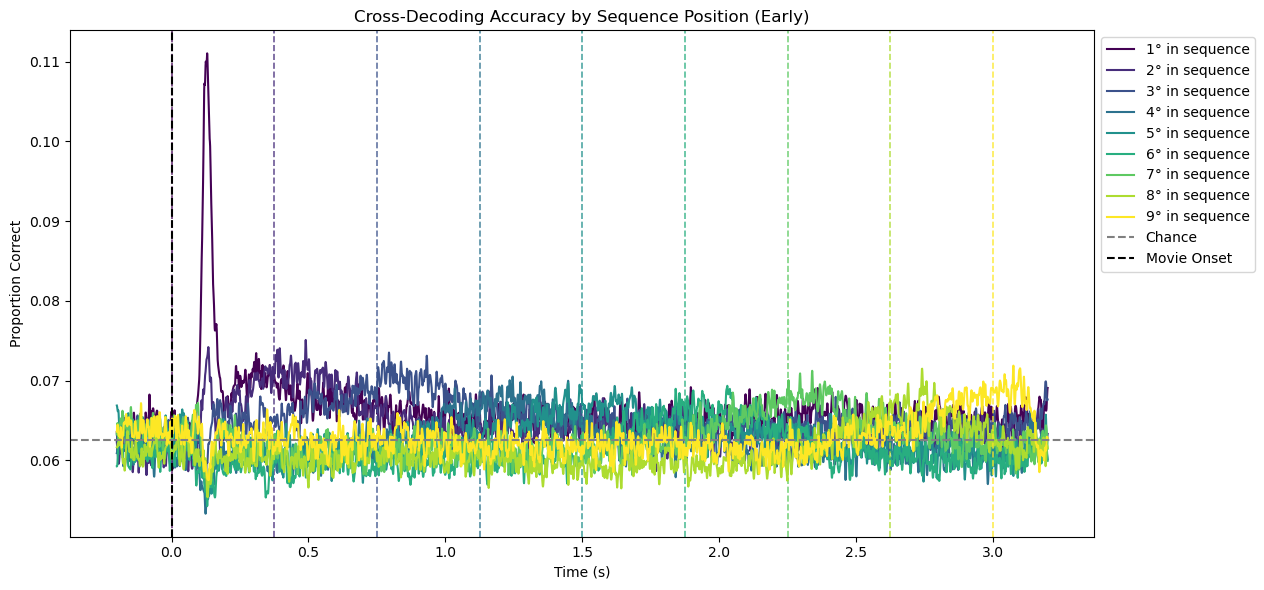

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/GroupAverage_SequencedAccuracy_Early.png


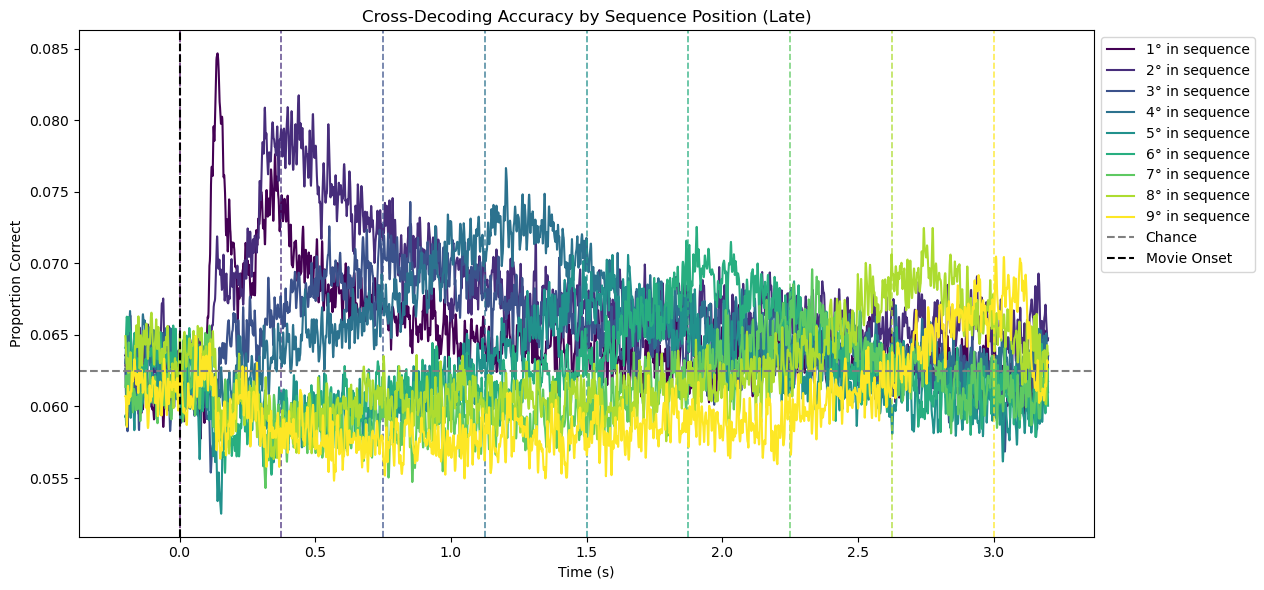

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/GroupAverage_SequencedAccuracy_Late.png


In [ ]:

def plot_group_average(group_avg, times, label, save_name):
    "Takes the averages of decoding for orientations over time by relative position, plots them"
    "group_avg: the numpy array of decoding accuracy by position"
    "times: the times in a movie"
    "label: specify early or late window for name on plot"
    "save_name: specify label for saving"
    
    plt.figure(figsize=(15, 6))
    n_positions = group_avg.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_positions))
    
    for pos in range(n_positions):
        smoothed = gaussian_filter1d(group_avg[pos], sigma=2)
        plt.plot(times, smoothed, label=f'{pos+1}° in sequence', color=colors[pos])
        onset_time = pos * 0.375
        if times[0] <= onset_time <= times[-1]:
            plt.axvline(onset_time, linestyle='--', color=colors[pos], alpha=0.8, linewidth=1.2)

    plt.axhline(1/16, linestyle='--', color='gray', label='Chance')
    plt.axvline(0, linestyle='--', color='black', label='Movie Onset')

    plt.xlabel('Time (s)')
    plt.ylabel('Proportion Correct')
    plt.title(f'Cross-Decoding Accuracy by Sequence Position ({label})')

    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    save_path = os.path.join(output_dir, f'GroupAverage_SequencedAccuracy_{save_name}.png')
    plt.savefig(save_path, dpi=300)
    plt.close()
    plt.show()
    print(f"Saved: {save_path}")

# === PLOT & SAVE BOTH ===
plot_group_average(group_avgEarly, times, 'Early', 'Early')
plot_group_average(group_avgLate, times, 'Late', 'Late')

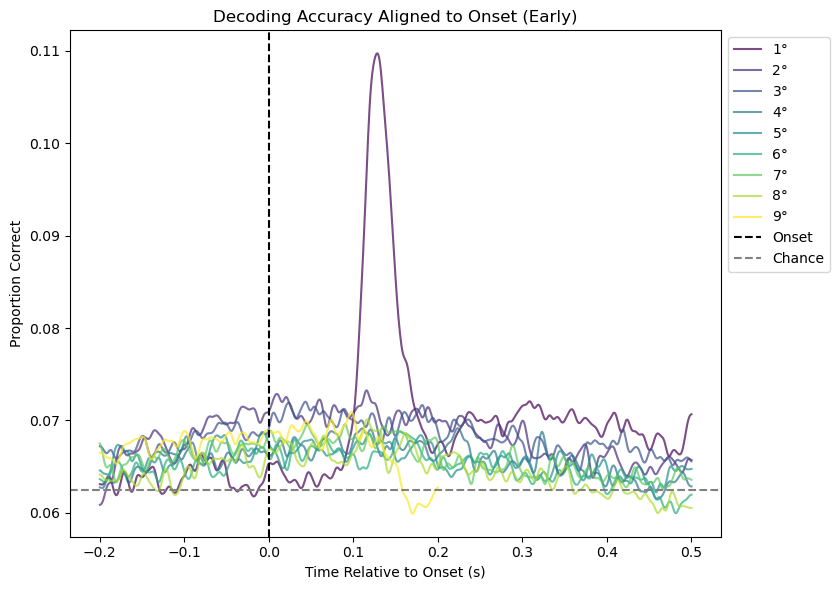

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/OnsetAlignedAccuracy_Early.png


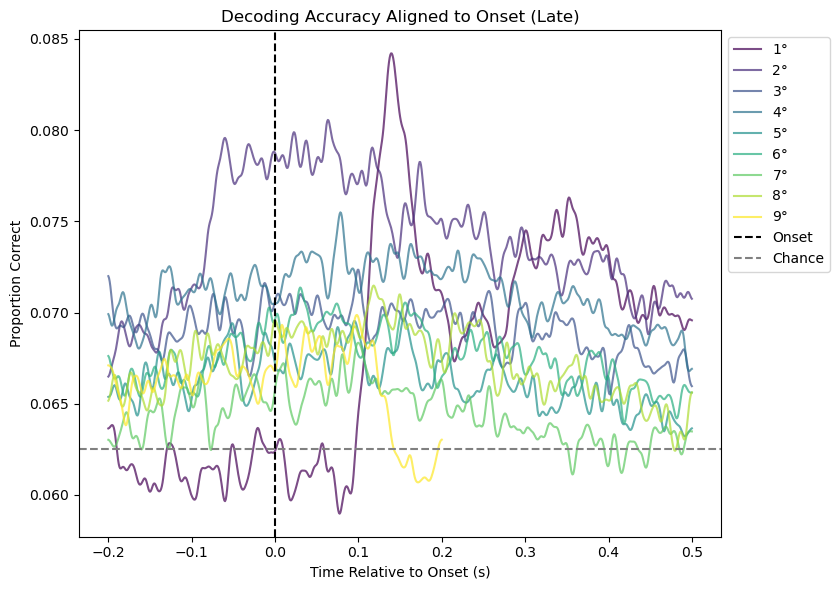

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/OnsetAlignedAccuracy_Late.png


In [ ]:
def plot_aligned_to_onset(group_avg, times, label, save_name):
    "Takes the averages of decoding for orientations over time by relative position, plots them"
    "Unlike the above function, here we align them all relative to their onset"
    "group_avg: the numpy array of decoding accuracy by position"
    "times: the times in a movie"
    "label: specify early or late window for name on plot"
    "save_name: specify label for saving"
    plt.figure(figsize=(10, 6))
    n_positions = group_avg.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_positions))

    rel_start = -0.2
    rel_end = 0.5
    rel_times = np.arange(rel_start, rel_end, times[1] - times[0])  # Assuming uniform sampling

    for pos in range(n_positions):
        onset_time = pos * 0.375
        window_start = onset_time + rel_start
        window_end = onset_time + rel_end

        # Get indices within this window
        mask = (times >= window_start) & (times <= window_end)
        if not np.any(mask):
            continue  # skip if no data in this window

        time_segment = times[mask] - onset_time  # shift to be relative
        data_segment = group_avg[pos][mask]
        smoothed = gaussian_filter1d(data_segment, sigma=4)

        plt.plot(time_segment, smoothed, label=f'{pos+1}°', color=colors[pos], alpha = .7)

    plt.axvline(0, linestyle='--', color='black', label='Onset')
    plt.axhline(1/16, linestyle='--', color='gray', label='Chance')

    plt.xlabel('Time Relative to Onset (s)')
    plt.ylabel('Proportion Correct')
    plt.title(f'Decoding Accuracy Aligned to Onset ({label})')

    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    save_path = os.path.join(output_dir, f'OnsetAlignedAccuracy_{save_name}.png')
    plt.show()
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved: {save_path}")

plot_aligned_to_onset(group_avgEarly, times, 'Early', 'Early')
plot_aligned_to_onset(group_avgLate, times, 'Late', 'Late')


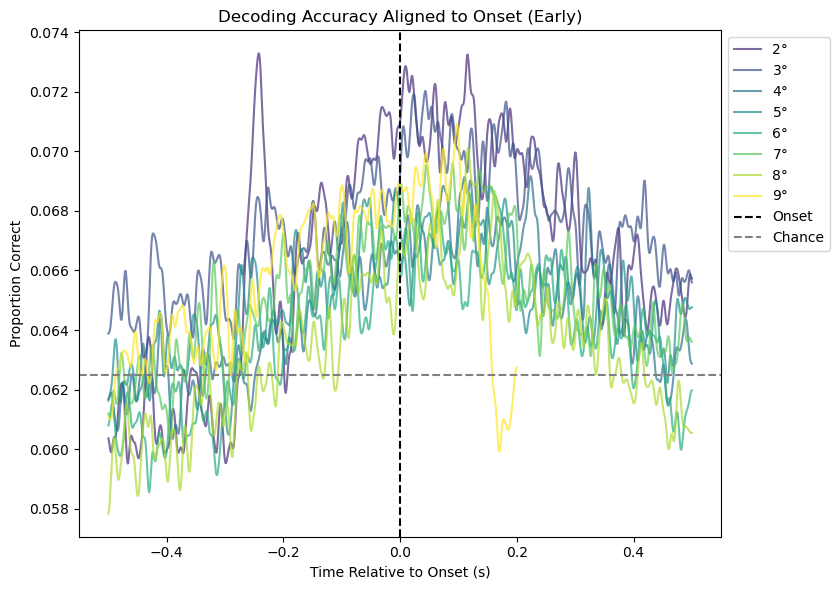

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/OnsetAlignedAccuracy_Early_ExcludeFirst.png


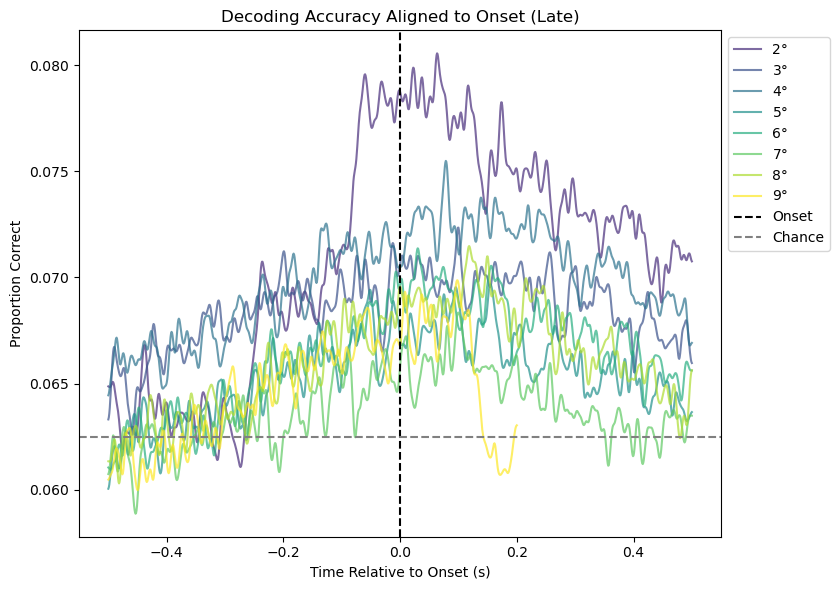

Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/OnsetAlignedAccuracy_Late_ExcludeFirst.png


In [ ]:
def plot_aligned_to_onset(group_avg, times, label, save_name):
    "Same as previous function, but we take out the first position and adjust the relative start/end times so it's symmetrical"
    plt.figure(figsize=(10, 6))
    n_positions = group_avg.shape[0]
    colors = plt.cm.viridis(np.linspace(0, 1, n_positions))

    rel_start = -0.5
    rel_end = 0.5
    rel_times = np.arange(rel_start, rel_end, times[1] - times[0])  # Assuming uniform sampling

    for pos in range(1, n_positions):
        onset_time = pos * 0.375
        window_start = onset_time + rel_start
        window_end = onset_time + rel_end

        # Get indices within this window
        mask = (times >= window_start) & (times <= window_end)
        if not np.any(mask):
            continue  # skip if no data in this window

        time_segment = times[mask] - onset_time  # shift to be relative
        data_segment = group_avg[pos][mask]
        smoothed = gaussian_filter1d(data_segment, sigma=4)

        plt.plot(time_segment, smoothed, label=f'{pos+1}°', color=colors[pos], alpha = .7)

    plt.axvline(0, linestyle='--', color='black', label='Onset')
    plt.axhline(1/16, linestyle='--', color='gray', label='Chance')

    plt.xlabel('Time Relative to Onset (s)')
    plt.ylabel('Proportion Correct')
    plt.title(f'Decoding Accuracy Aligned to Onset ({label})')

    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    save_path = os.path.join(output_dir, f'OnsetAlignedAccuracy_{save_name}_ExcludeFirst.png')
    #plt.savefig(save_path, dpi=300)
    #plt.close()
    plt.show()
    print(f"Saved: {save_path}")

plot_aligned_to_onset(group_avgEarly, times, 'Early', 'Early')
plot_aligned_to_onset(group_avgLate, times, 'Late', 'Late')


In [ ]:
def plot_position1_vs_LDA(group_avg_seq, group_avg_lda, times, label, save_name):
    """
    Compare position 1 curve from sequenced decoding vs. LDA static decoding curve.
    The sequenced data curve is trimmed to length 961 samples; LDA curve is plotted full length.
    """
    import os
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 5))

    # Trim position 1 from sequenced data and its corresponding time vector
    fixed_length = 961
    data_seq = group_avg_seq[0][:fixed_length]
    time_seq = times[:fixed_length]
    print(len(group_avg_lda))
    print(len(times))
    # Make sure LDA curve is same length as its time axis
    if len(group_avg_lda) != len(times):
        raise ValueError("Length of `group_avg_lda` does not match `times`.")
    print(len(group_avg_lda))
    # Plot both
    plt.plot(time_seq, data_seq, label='Sequenced Pos 1', color='tab:blue')
    plt.plot(times, group_avg_lda, label='Static LDA', color='tab:red', linestyle='--')

    # Formatting
    plt.axvline(0, linestyle='--', color='black', label='Onset')
    plt.axhline(1/16, linestyle=':', color='gray', label='Chance')
    plt.xlabel('Time Relative to Onset (s)')
    plt.ylabel('Proportion Correct')
    plt.title(f'Position 1 vs. Static Decoding ({label})')
    plt.legend()
    plt.tight_layout()

    # Save
    save_path = os.path.join(output_dir, f'Compare_Pos1_vs_LDA_{save_name}.png')
    plt.savefig(save_path, dpi=300)
    plt.close()
    plt.show()
    print(f"Saved: {save_path}")




# Example call:
plot_position1_vs_LDA(group_avgEarly, group_avg_withinEarly, timesStill, 'Early', 'Early')
plot_position1_vs_LDA(group_avgLate, group_avg_withinLate, timesStill, 'Late', 'Late')


961
961
961
Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/Compare_Pos1_vs_LDA_Early.png
961
961
961
Saved: /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/ProportionsOverTime/Plots/Compare_Pos1_vs_LDA_Late.png


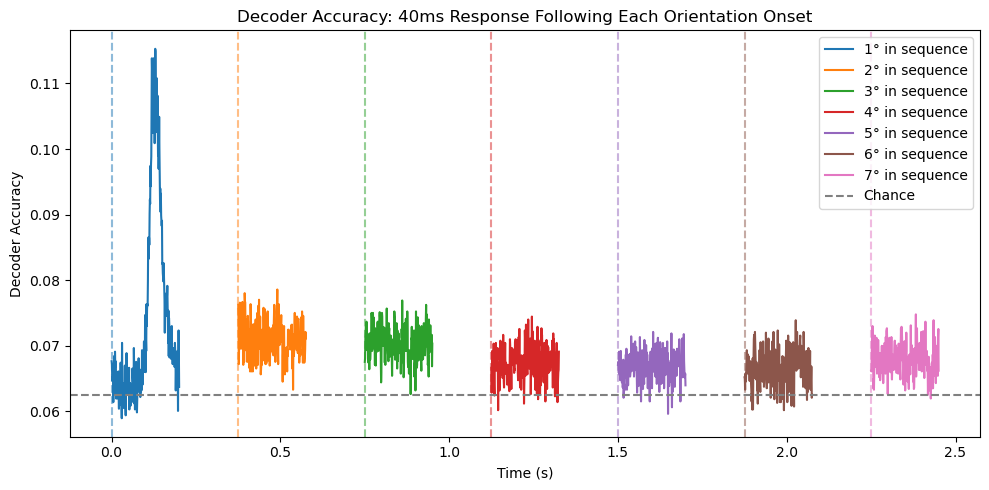

In [17]:
sampling_rate = 1200
frame_interval = 0.375  # seconds
window_length = 0.2    # 40 ms
n_positions = 7

# Orientation onset times
onset_times = np.array([i * frame_interval for i in range(n_positions)])
windowed_curves = []
windowed_times = []

for pos, onset_time in enumerate(onset_times):
    start_idx = np.argmin(np.abs(times - onset_time))
    end_idx = np.argmin(np.abs(times - (onset_time + window_length)))

    curve_segment = group_avgEarly[pos, start_idx:end_idx+1]
    time_segment = times[start_idx:end_idx+1]  # ← absolute time (not zeroed)

    windowed_curves.append(curve_segment)
    windowed_times.append(time_segment)
plt.figure(figsize=(10, 5))
colors = plt.get_cmap('tab10').colors[:n_positions]

for pos in range(n_positions):
    plt.plot(windowed_times[pos], windowed_curves[pos], color=colors[pos], label=f'{pos+1}° in sequence')
    plt.axvline(onset_times[pos], color=colors[pos], linestyle='--', alpha=0.5)

plt.axhline(1/16, linestyle='--', color='gray', label='Chance')
plt.xlabel('Time (s)')
plt.ylabel('Decoder Accuracy')
plt.title('Decoder Accuracy: 40ms Response Following Each Orientation Onset')
plt.legend(loc='upper right')
plt.tight_layout()
#plt.savefig(f"{output_dir}/Sequenced_40ms_Snapshots.png")
plt.show()
